![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Blur Detection - Finding In-focus Images**

In this lesson we'll learn to use the Laplacian variance to find which image is the sharpest or most in-focus.



### **To Detect Blur, we simply Convolve with the Laplacian kernel.**

We take the grayscale of an image can then convolve it with the Laplacian kernel (3 x 3 kernel):

To quantify blur, we then take the variance of the response output.

The Laplacian is the 2nd derivative of an image and thus it highlights the areas of an image containing rapid intensity changes. Hence it's use in Edge Detection. 

A high variance should in theory, indicate the presence of both edge-like and non-edge like (hence the wide range of values resulting in a high variance), which is typical of a normal in-focus image. 

A low variance, thus might mean very little edges in the image meaning it might be blurred as the more blur present the less edges there are.

In [1]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-06-05 11:55:23--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.158
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  19.1MB/s    in 1.5s    

2023-06-05 11:55:24 (19.1 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [2]:
import cv2
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
  h, w = image.shape[:2]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(title)
  plt.show()

#### **Produce some Blurred Images**

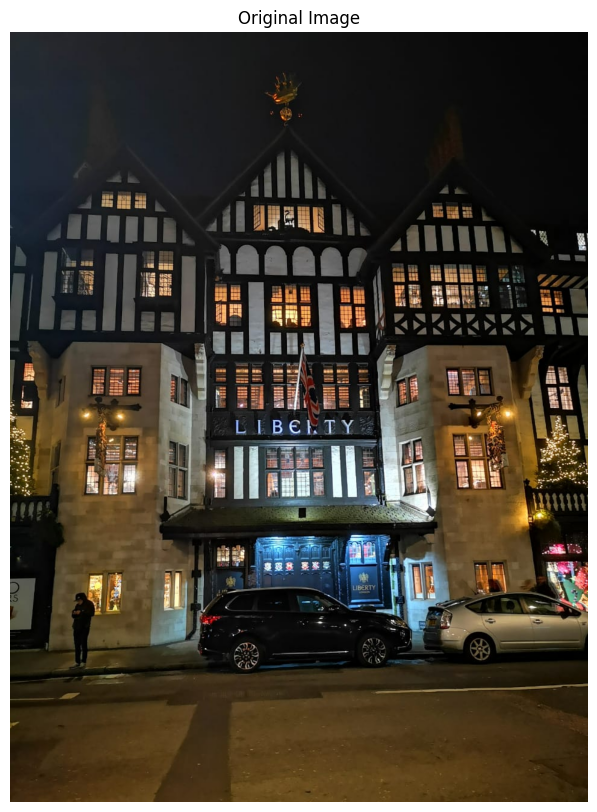

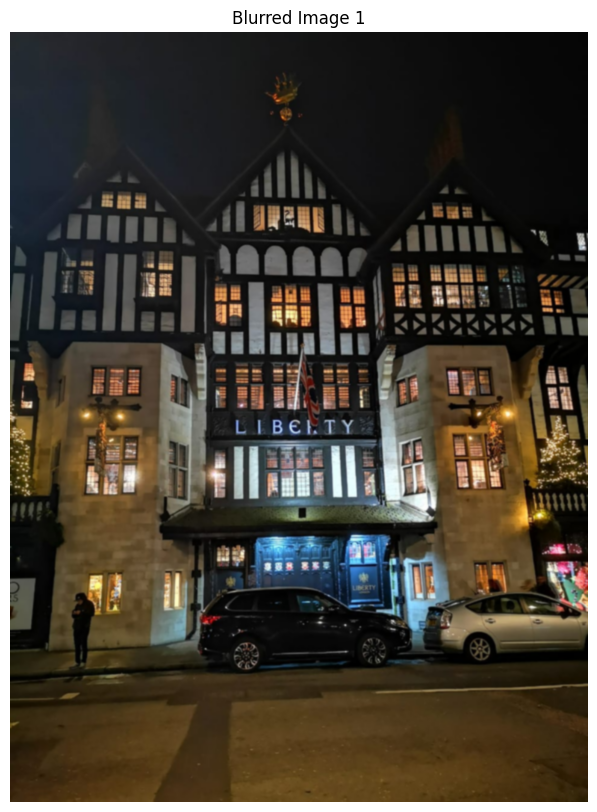

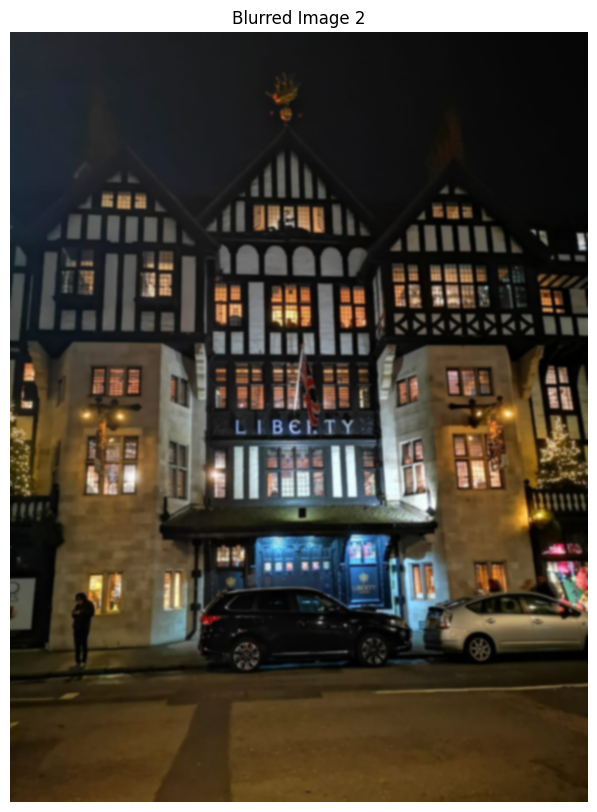

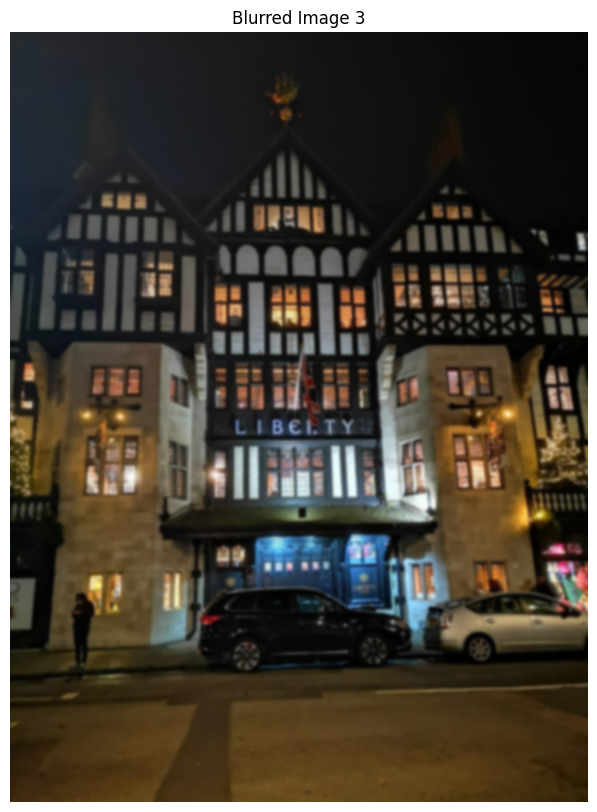

In [3]:
image = cv2.imread('./images/liberty.jpeg')
imshow("Original Image", image)

blur_1 = cv2.GaussianBlur(image, (5,5), 0)
imshow('Blurred Image 1', blur_1) 

blur_2 = cv2.GaussianBlur(image, (9,9), 0)
imshow('Blurred Image 2', blur_2) 

blur_3 = cv2.GaussianBlur(image, (13,13), 0)
imshow('Blurred Image 3', blur_3) 

In [4]:
def getBlurScore(image):
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return cv2.Laplacian(image, cv2.CV_64F).var()

#### **Show our scores, remember higher means less blur!**

In [5]:
print("Blur Score = {}".format(getBlurScore(image)))
print("Blur Score = {}".format(getBlurScore(blur_1)))
print("Blur Score = {}".format(getBlurScore(blur_2)))
print("Blur Score = {}".format(getBlurScore(blur_3)))

Blur Score = 894.1643803618214
Blur Score = 64.20102699531715
Blur Score = 14.90084552899931
Blur Score = 6.293340649969713
